In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [2]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.2810)


In [3]:
## Solution

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3118)


In [4]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 0.7652, -1.4550],
        [-1.2232,  0.1810]])


In [5]:
y = x**2
print(y)

tensor([[ 0.5856,  2.1170],
        [ 1.4962,  0.0328]])


In [6]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

In [7]:
z = y.mean()
print(z)

tensor(1.0579)


In [8]:
print(x.grad)

None


In [9]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.3826, -0.7275],
        [-0.6116,  0.0905]])
tensor([[ 0.3826, -0.7275],
        [-0.6116,  0.0905]])


In [10]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [11]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor(1.00000e-02 *
       [[-0.0296, -0.0296, -0.0296,  ..., -0.0296, -0.0296, -0.0296],
        [-0.0441, -0.0441, -0.0441,  ..., -0.0441, -0.0441, -0.0441],
        [ 0.0177,  0.0177,  0.0177,  ...,  0.0177,  0.0177,  0.0177],
        ...,
        [ 0.4021,  0.4021,  0.4021,  ...,  0.4021,  0.4021,  0.4021],
        [-0.1361, -0.1361, -0.1361,  ..., -0.1361, -0.1361, -0.1361],
        [-0.0155, -0.0155, -0.0155,  ..., -0.0155, -0.0155, -0.0155]])


In [12]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [13]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 3.5691e-02,  2.1438e-02,  2.2862e-02,  ..., -1.3882e-02,
         -2.3719e-02, -4.6573e-03],
        [-3.2397e-03,  3.5117e-03, -1.5220e-03,  ...,  1.4400e-02,
          2.8463e-03,  2.5381e-03],
        [ 5.6122e-03,  4.8693e-03, -3.4507e-02,  ..., -2.8224e-02,
         -1.2907e-02, -1.5818e-02],
        ...,
        [-1.4372e-02,  2.3948e-02,  2.8374e-02,  ..., -1.5817e-02,
          3.2719e-02,  8.5537e-03],
        [-1.1999e-02,  1.9462e-02,  1.3998e-02,  ..., -2.0170e-03,
          1.4254e-02,  2.2238e-02],
        [ 3.9955e-04,  4.8263e-03, -2.1819e-02,  ...,  1.2959e-02,
         -4.4880e-03,  1.4609e-02]])
Gradient - tensor(1.00000e-02 *
       [[-0.2609, -0.2609, -0.2609,  ..., -0.2609, -0.2609, -0.2609],
        [-0.0695, -0.0695, -0.0695,  ..., -0.0695, -0.0695, -0.0695],
        [ 0.0514,  0.0514,  0.0514,  ...,  0.0514,  0.0514,  0.0514],
        ...,
        [ 0.0967,  0.0967,  0.0967,  ...,  0.0967,  0.0967,  0.0967],
  

In [14]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 3.5717e-02,  2.1464e-02,  2.2888e-02,  ..., -1.3856e-02,
         -2.3693e-02, -4.6312e-03],
        [-3.2327e-03,  3.5187e-03, -1.5150e-03,  ...,  1.4407e-02,
          2.8533e-03,  2.5450e-03],
        [ 5.6071e-03,  4.8642e-03, -3.4513e-02,  ..., -2.8230e-02,
         -1.2912e-02, -1.5823e-02],
        ...,
        [-1.4381e-02,  2.3938e-02,  2.8365e-02,  ..., -1.5827e-02,
          3.2709e-02,  8.5441e-03],
        [-1.1981e-02,  1.9481e-02,  1.4016e-02,  ..., -1.9983e-03,
          1.4272e-02,  2.2257e-02],
        [ 3.9674e-04,  4.8235e-03, -2.1821e-02,  ...,  1.2956e-02,
         -4.4908e-03,  1.4606e-02]])


In [15]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8959971736234897
Training loss: 0.8684300759644397
Training loss: 0.537974218426864
Training loss: 0.43723612014990626
Training loss: 0.39094475933165945


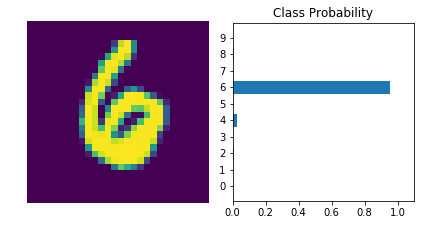

In [17]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)